[1. 1. 1.]
[0.84147096 0.84147096 0.84147096]


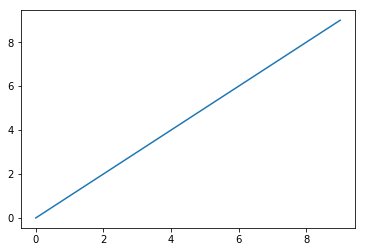

In [3]:
from numpy import *
from matplotlib.pyplot import *

# Listing 1.1
x = array([1,1,1],dtype=float32)
print(x)

# Listing 1.2
y=sin(array([1,1,1],dtype=float32) )
print(y)

# Listing 1.18
plot(range(10))

Text(0,0.5,'Amplitude')

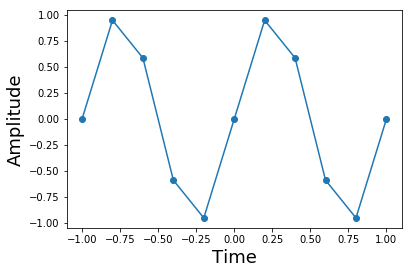

In [4]:
# Listing 2.1
from __future__ import division

fig,ax = subplots()
f = 1.0 # Hz, signal frequency
fs = 5.0 # Hz, sampling rate (ie. >= 2*f)
t = arange(-1,1+1/fs,1/fs) # sample interval, symmetric
# for convenience later
x = sin(2*pi*f*t)
ax.plot(t,x,'o-')
ax.set_xlabel('Time',fontsize=18)
ax.set_ylabel('Amplitude',fontsize=18)

Text(0,0.5,'Amplitude')

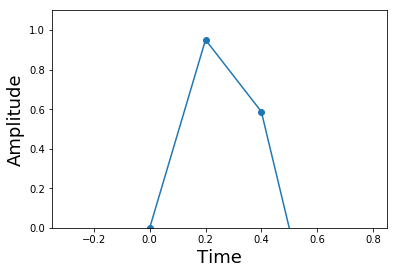

In [5]:
# Listing 2.2
fig,ax = subplots()
ax.plot(t,x,'o-')
ax.axis(xmin = 1/(4*f)-1/fs*3,
xmax = 1/(4*f)+1/fs*3,
ymin = 0,
ymax = 1.1 )
ax.set_xlabel('Time',fontsize=18)
ax.set_ylabel('Amplitude',fontsize=18)

Text(0.5,1,'Errors with Piecewise Linear Interpolant')

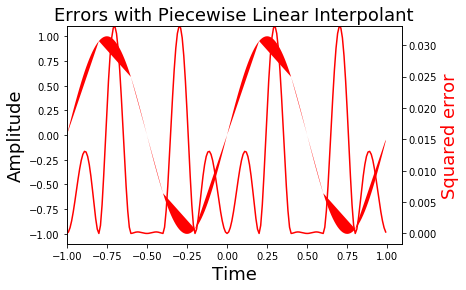

In [6]:
# Listing 2.3
interval = [] # piecewise domains
apprx = [] # line on domains
# build up points *evenly* inside of intervals
tp = hstack([linspace(t[i],t[i+1],20,False) for i in range(len(t)-1)])
# construct arguments for piecewise
for i in range(len(t)-1):
    interval.append(logical_and(t[i] <= tp, tp < t[i+1]))
    apprx.append((x[i+1]-x[i])/(t[i+1]-t[i])*(tp[interval[-1]]-t[i]) + x[i])
x_hat = piecewise(tp,interval,apprx) # piecewise linear approximation

# Listing 2.4
fig,ax1 = subplots()
# fill in the difference between the interpolant and the sine
ax1.fill_between(tp,x_hat,sin(2*pi*f*tp),facecolor='red')
ax1.set_xlabel('Time',fontsize=18)
ax1.set_ylabel('Amplitude',fontsize=18)
ax2 = ax1.twinx() # create clone of ax1
sqe = (x_hat-sin(2*pi*f*tp))**2 #compute squared-error
ax2.plot(tp, sqe,'r')
ax2.axis(xmin=-1,ymax= sqe.max() )
ax2.set_ylabel('Squared error', color='r',fontsize=18)
ax1.set_title('Errors with Piecewise Linear Interpolant',fontsize=18)

Text(0.5,1,'Sampling Rate=5.00 Hz')

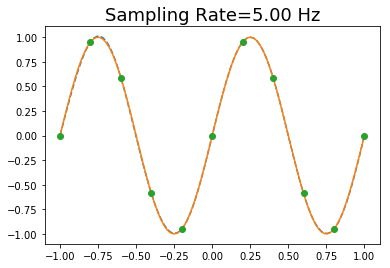

In [7]:
# Listing 2.5
fig,ax = subplots()
t = linspace(-1,1,100) # redefine this here for convenience
ts = arange(-1,1+1/fs,1/fs) # sample points
num_coeffs = len(ts)
sm = 0
for k in range(-num_coeffs,num_coeffs): # since function is real, need both sides
    sm += sin(2*pi*(k/fs))*sinc(k - fs*t)
ax.plot(t,sm,'--',t,sin(2*pi*t),ts,sin(2*pi*ts),'o')
ax.set_title('Sampling Rate=%3.2f Hz' % fs, fontsize=18 )

Text(0.5,1,'Errors with Whittaker Interpolant')

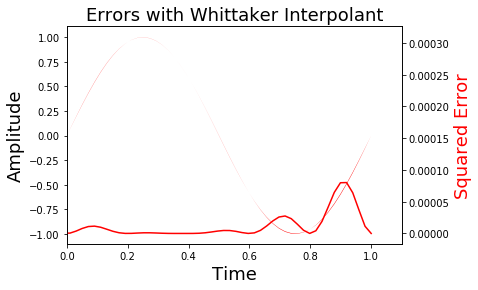

In [8]:
# Listing 2.6
fig,ax1 = subplots()
ax1.fill_between(t,sm,sin(2*pi*f*t),facecolor='red')
ax1.set_ylabel('Amplitude',fontsize=18)
ax1.set_xlabel('Time',fontsize=18)
ax2 = ax1.twinx()
sqe = (sm - sin(2*pi*f*t))**2
ax2.plot(t, sqe,'r')
ax2.axis(xmin=0,ymax = sqe.max())
ax2.set_ylabel('Squared Error', color='r',fontsize=18)
ax1.set_title('Errors with Whittaker Interpolant',fontsize=18)

Text(-0.9,0.5,'no interference here')

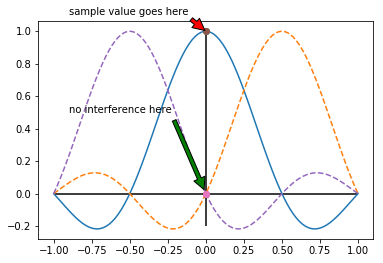

In [9]:
# Listing 2.7
fig,ax = subplots()
k = 0
fs = 2 # makes this plot easier to read
ax.plot(t,sinc(k - fs * t),
        t,sinc(k+1 - fs * t),'--',k/fs,1,'o',(k)/fs,0,'o',
        t,sinc(k-1 - fs * t),'--',k/fs,1,'o',(-k)/fs,0,'o'
)
ax.hlines(0,-1,1) # horizontal lines
ax.vlines(0,-.2,1) # vertical lines
ax.annotate('sample value goes here',
            xy=(0,1), # arrowhead position
            xytext=(-1+.1,1.1),# text position
            arrowprops={'facecolor':'red','shrink':0.05},
)
ax.annotate('no interference here',
            xy=(0,0),
            xytext=(-1+.1,0.5),
            arrowprops={'facecolor':'green','shrink':0.05},
)

Text(3.1,0.5,'... and going...')

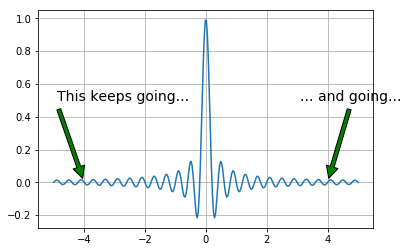

In [10]:
# Listing 2.9
t = linspace(-5,5,300) # redefine this here for convenience
fig,ax = subplots()

fs = 5.0 # sampling rate
ax.plot(t,sinc(fs * t))
ax.grid() # put grid on axes
ax.annotate('This keeps going...',
            xy=(-4,0),
            xytext=(-5+.1,0.5),
            arrowprops={'facecolor':'green','shrink':0.05},
            fontsize=14)
ax.annotate('... and going...',
            xy=(4,0),
            xytext=(3+.1,0.5),
            arrowprops={'facecolor':'green','shrink':0.05},
            fontsize=14)

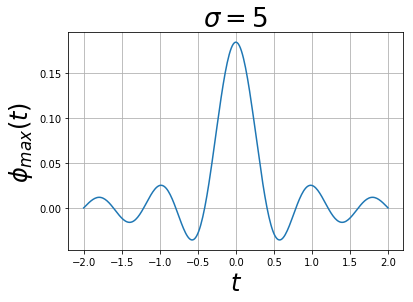

In [13]:
# Listing 2.12
#from numpy import linalg as LA
from numpy.linalg import linalg
def kernel_tau(x,W=1):
    'convenient function to compute kernel of eigenvalue problem'
    x = asanyarray(x) # ensure x is array
    y = pi*where(x == 0,1.0e-20, x)# avoid divide by zero
    return sin(2*W*y)/y

nstep = 300 # quick and dirty integral quantization
t = linspace(-1,1,nstep) # quantization of time
tt = linspace(-2,2,nstep)# extend interval
sigma = 5
W = sigma/2./2./t.max()
w,v = eig(kernel_tau(t-tt[:,None],W)) # compute e-vectors/e-values
maxv = v[:,w.real.argmax()].real # take real part

fig,ax = subplots()
ax.plot(tt, maxv/sign(maxv[int(nstep/2)])) # normalize for orientation
ax.set_xlabel('$t$',fontsize=24)
ax.set_ylabel(r'$\phi_{max}(t)$',fontsize=24)
ax.set_title('$\sigma=%d$'%(2*W*2*t.max()),fontsize=26)
ax.grid()

Text(0.5,0,'n')

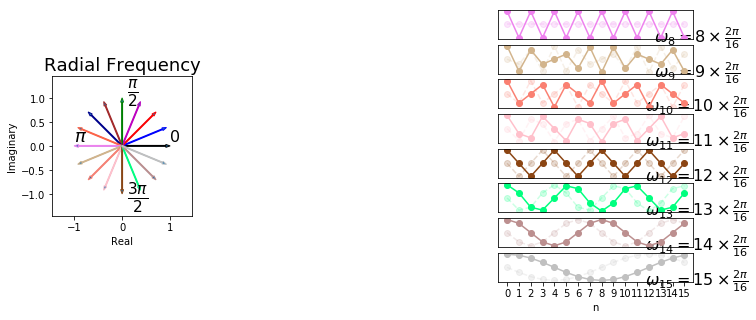

In [16]:
# Listing 3.1
from matplotlib.patches import FancyArrow
import mpl_toolkits.mplot3d.art3d as art3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.gridspec as gridspec

def dftmatrix(Nfft=32,N=None):
    'construct DFT matrix'
    k= arange(Nfft)
    if N is None: N = Nfft
    n = arange(N)
    U = matrix(exp(1j* 2*pi/Nfft *k*n[:,None])) # use numpy broadcasting to create matrix 
    return U/sqrt(Nfft)

Nfft=16
v = ones((16,1))
U = dftmatrix(Nfft=Nfft,N=16)
# ---
# hardcoded constants to format complicated figure

gs = gridspec.GridSpec(8,12)
gs.update( wspace=1, left=0.01)

fig =figure(figsize=(10,5))
ax0 = subplot(gs[:,:3])
fig.add_subplot(ax0)

ax0.set_aspect(1)
a=2*pi/Nfft*arange(Nfft)

colors = ['k','b','r','m','g','Brown','DarkBlue','Tomato','Violet','Tan',
          'Salmon','Pink','SaddleBrown','SpringGreen','RosyBrown','Silver',]
for j,i in enumerate(a):
    ax0.add_patch(FancyArrow(0,0,cos(i),sin(i),width=0.02,
                             length_includes_head=True,edgecolor=colors[j]))

ax0.text(1,0.1,'0',fontsize=16)
ax0.text(0.1,1,r'$\frac{\pi}{2}$',fontsize=22)
ax0.text(-1,0.1,r'$\pi$',fontsize=18)
ax0.text(0.1,-1.2,r'$\frac{3\pi}{2}$',fontsize=22)
ax0.axis(array([-1,1,-1,1])*1.45)
ax0.set_title('Radial Frequency',fontsize=18)
ax0.set_xlabel('Real')
ax0.set_ylabel('Imaginary')

# plots in the far right column
for i in range(8):
    ax=subplot(gs[i,8:])
    ax.set_xticks([]); ax.set_yticks([])
    ax.set_ylabel(r'$\omega_{%d}=%d\times\frac{2\pi}{16}$'%(i+8,i+8),fontsize=16,
    rotation='horizontal')
    ax.plot(U.real[:,i+8],'-o',color=colors[i+8])
    ax.plot(U.imag[:,i+8],'--o',color=colors[i+8],alpha=0.2)
    ax.axis(ymax=4/Nfft*1.1,ymin=-4/Nfft*1.1)
    ax.yaxis.set_label_position('right')
ax.set_xticks(arange(16))
ax.set_xlabel('n')

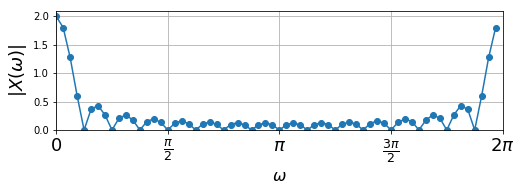

In [18]:
# Listing 3.2
U = dftmatrix(64,16)
x = ones((16,1))
X = U.H*x

fig,ax = subplots()
fig.set_size_inches((8,4))
ax.set_aspect(0.8)
ax.grid()
ax.plot(arange(0,64)*2*pi/64.,abs(X),'o-')
ax.set_ylabel(r'$|X(\omega)|$',fontsize=18)
ax.set_xticks([0, pi/2., pi, 3*pi/2,2*pi])
ax.set_xlabel(r'$\omega$',fontsize=16)
ax.axis([0, 2*pi,0,2.1])
ax.set_xticklabels(['0',r'$\frac{\pi}{2}$', r'$\pi$',r'$\frac{3\pi}{2}$',
                    r'$2\pi$'], fontsize=18);

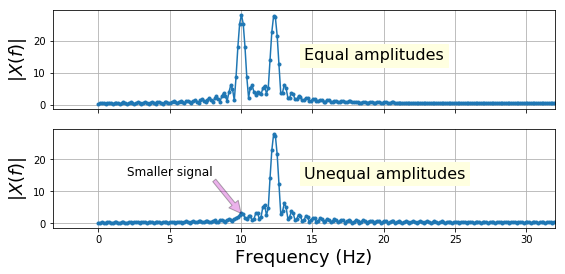

In [22]:
# Listing 4.7
from scipy import signal
from numpy import fft

# some useful functions
def dftmatrix(Nfft=32,N=None):
    'construct DFT matrix'
    k= arange(Nfft)
    if N is None: N = Nfft
    n = arange(N)
    U = matrix(exp(1j* 2*pi/Nfft *k*n[:,None])) # use numpy broadcasting to create matrix 
    return U/sqrt(Nfft)

def db20(W,Nfft=None):
    'Given DFT, return power level in dB'
    if Nfft is None: # assume W is DFT
        return 20*log10(abs(W))
    else: # assume time-domain passed, so need DFT
        return 20*log10(abs( fft.fft(W,Nfft)/sqrt(Nfft) ) )

fs = 64 # sampling frequency
t = arange(0,2,1/fs)
f = 10 # one signal
deltaf = 2.3 # second nearby frequency

Nf = 512
fig,ax = subplots(2,1,sharex=True,sharey=True)
fig.set_size_inches((9,4))

x=10*cos(2*pi*f*t) + 10*cos(2*pi*(f+deltaf)*t) # equal amplitudes
X = fft.fft(x,Nf)/sqrt(Nf)

ax[0].plot(linspace(0,fs,len(X)),abs(X),'-o',ms=3.)
ax[0].set_ylabel(r'$|X(f)|$',fontsize=18)
ax[0].set_xlim(xmax = fs/2)
ax[0].grid()
ax[0].text(0.5,0.5,'Equal amplitudes',
            transform=ax[0].transAxes,
            backgroundcolor='Lightyellow',
            fontsize=16)

x=cos(2*pi*f*t) + 10*cos(2*pi*(f+deltaf)*t) # one has 10x the amplitude
X = fft.fft(x,Nf)/sqrt(Nf)
ax[1].plot(linspace(0,fs,len(X)),abs(X),'-o',ms=3.)
ax[1].set_ylabel(r'$|X(f)|$',fontsize=18)
ax[1].set_xlabel('Frequency (Hz)',fontsize=18)
ax[1].set_xlim(xmax = fs/2)
ax[1].grid()

ax[1].text(0.5,0.5,'Unequal amplitudes',
            transform=ax[1].transAxes,
            backgroundcolor='lightyellow',
            fontsize=16)
ax[1].annotate('Smaller signal',
            fontsize=12,xy=(f,abs(X)[int(f/fs*Nf)]),
            xytext=(2,15),
            arrowprops={'facecolor':'m','alpha':.3});

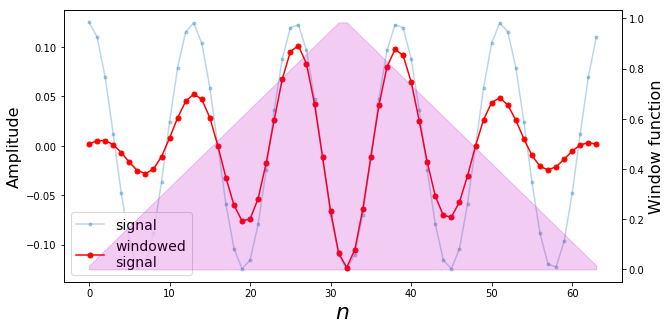

In [23]:
# Listing 4.8
fig,ax = subplots()
fig.set_size_inches((10,5))

Nf = 128
nsamp = 64
window = signal.triang(nsamp)
rectwin = ones(nsamp)

x = array(dftmatrix(64,64)[:,5].real).flatten() # convert to numpy array
n = arange(len(x))
window = signal.triang(len(x))

ax.plot(n,x,'-o',label='signal',ms=3.,alpha=0.3)
ax.plot(n,window*x,'-or',label='windowed\nsignal',ms=5.)
ax.set_ylabel('Amplitude',fontsize=16)
ax.set_xlabel('$n$',fontsize=22)
ax.legend(loc=0,fontsize=14)
ax2 = ax.twinx()
ax2.fill_between(n,window,alpha=0.2,color='m')
ax2.set_ylabel('Window function',fontsize=16);

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10


Text(0.4,0.5,'Peak sidelobe level')

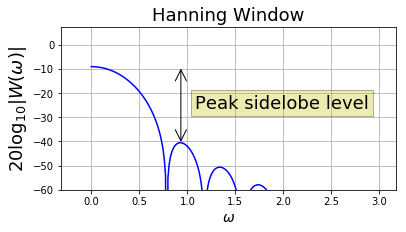

In [26]:
# Listing 4.13
fig, ax = subplots()
fig.set_size_inches((6,3))

Ns= 16
Nf = 256*2
freqs = arange(Nf)*2*pi/Nf
w = signal.windows.hann(Ns,False)
W = db20(w,Nf)

ax.plot(freqs,W,'-b',ms=4.)
ax.set_ylim(ymin = -60)
ax.set_xlim(xmax = pi*1.01)
ax.set_xlabel(r'$\omega$',fontsize=14)
ax.set_ylabel(r'$20\log_{10}|W(\omega)|$',fontsize=18)
ax.grid()
ax.set_title('Hanning Window',fontsize=18)
ax.annotate('',fontsize=28,
            xy=(76/Nf*2*pi,W[0]),
            xytext=(76/Nf*2*pi,W[0]-32),
            arrowprops={'facecolor':'b','arrowstyle':'<->'},
            )
ax.text(0.4,0.5,'Peak sidelobe level',
            fontsize=18,
            transform=ax.transAxes,
            bbox={'fc':'y','alpha':.3})

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log10


Text(1.3,-2,'-3 dB')

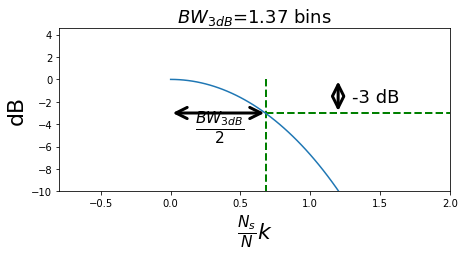

In [28]:
# Listing 4.16
fig,ax = subplots()
fig.set_size_inches((7,3))

N=512
w=signal.windows.hamming(Ns)
W=db20(w,N)

m =10
p=np.polyfit(arange(m)/N*Ns,W[:m]-W[0]+3.01,2) # fit quadratic polynomial
width = roots(p)[0]*2 # 3-dB beamwidth

ax.plot(arange(N)/N*Ns,W-W[0]) # normalize to peak
ax.set_ylim(ymin=-10)
ax.set_xlim(xmax = 2)

ax.vlines(width/2,0,-60,lw=2.,linestyle='--',color='g')
ax.set_ylabel('dB',fontsize=22)
ax.set_title(r'$ BW_{3dB}$=%3.2f bins'%width,fontsize=18)
ax.set_xlabel(r'$\frac{N_s}{N} k$',fontsize=22)
ax.annotate('',fontsize=28,xy=(0,-3),
        xytext=(width/2,-3),
        arrowprops=dict(arrowstyle="<->",lw=3))
ax.annotate('',fontsize=28,xy=(1.2,0),
        xytext=(1.2,-3),
        arrowprops=dict(arrowstyle="<->",lw=3))
ax.hlines(-3,width/2,2,linestyle='--',color='g',lw=2.)
ax.text( width/2/4,-5,r'$\frac{BW_{3dB}}{2}$',fontsize=22)
ax.text( 1.3,-2,'-3 dB',fontsize=18)

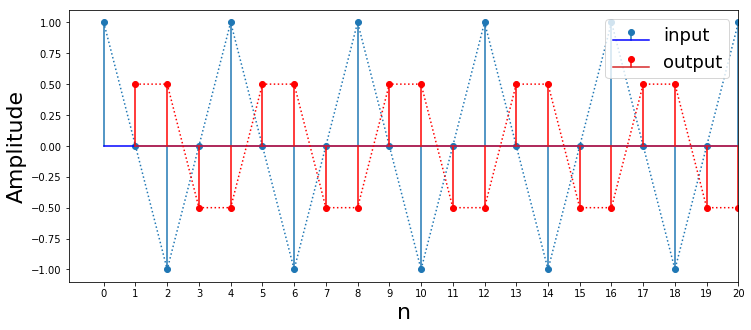

In [30]:
#Listing 5.1
from scipy import signal

Ns=30 # length of input sequence
n= arange(Ns) # sample index
x = cos(arange(Ns)*pi/2.)
y= signal.lfilter([1/2.,1/2.],1,x)

fig,ax = subplots(1,1)
fig.set_size_inches(12,5)

ax.stem(n,x,label='input',basefmt='b-')
ax.plot(n,x,':')
ax.stem(n[1:],y[:-1],markerfmt='ro',linefmt='r-',label='output')
ax.plot(n[1:],y[:-1],'r:')
ax.set_ylim(ymin=-1.1,ymax=1.1)
ax.set_xlabel("n",fontsize=22)
ax.legend(loc=0,fontsize=18)
ax.set_xticks(n)
ax.set_xlim(xmin=-1.1,xmax=20)
ax.set_ylabel("Amplitude",fontsize=22);

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


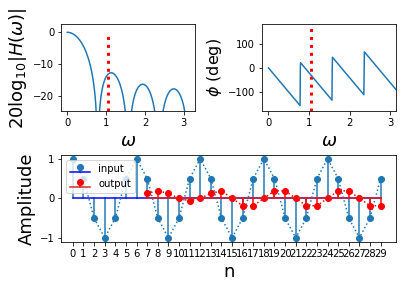

In [36]:
# Listing 5.2
from matplotlib import gridspec

fig=figure()
#fig.set_size_inches((8,5))

gs = gridspec.GridSpec(2,2)
# add vertical and horizontal space
gs.update(wspace=0.5, hspace=0.5)

ax = fig.add_subplot(subplot(gs[0,0]))

ma_length = 8 # moving average filter length
w,h=signal.freqz(ones(ma_length)/ma_length,1)
ax.plot(w,20*log10(abs(h)))
ax.set_ylabel(r"$ 20 \log_{10}|H(\omega)| $",fontsize=18)
ax.set_xlabel(r"$\omega$",fontsize=18)
ax.vlines(pi/3,-25,0,linestyles=':',color='r',lw=3.)
ax.set_ylim(ymin=-25)

ax = fig.add_subplot(subplot(gs[0,1]))
ax.plot(w,angle(h,deg=True))
ax.set_xlabel(r'$\omega$',fontsize=18)
ax.set_ylabel(r"$\phi $ (deg)",fontsize=16)
ax.set_xlim(xmax = pi)
ax.set_ylim(ymin=-180,ymax=180)
ax.vlines(pi/3,-180,180,linestyles=':',color='r',lw=3.)
ax = fig.add_subplot(subplot(gs[1,:]))

Ns=30
n= arange(Ns)
x = cos(arange(Ns)*pi/3.)
y= signal.lfilter(ones(ma_length)/ma_length,1,x)

ax.stem(n,x,label='input',basefmt='b-')
ax.plot(n,x,':')
ax.stem(n[ma_length-1:],y[:-ma_length+1],
        markerfmt='ro',
        linefmt='r-',
        label='output')
ax.plot(n[ma_length-1:],y[:-ma_length+1],'r:')
ax.set_xlim(xmin=-1.1)
ax.set_ylim(ymin=-1.1,ymax=1.1)
ax.set_xlabel("n",fontsize=18)
ax.set_xticks(n)
ax.legend(loc=0)
ax.set_ylabel("Amplitude",fontsize=18);

Text(0,0.5,'$20\\log_{10}|H(\\omega)| $')

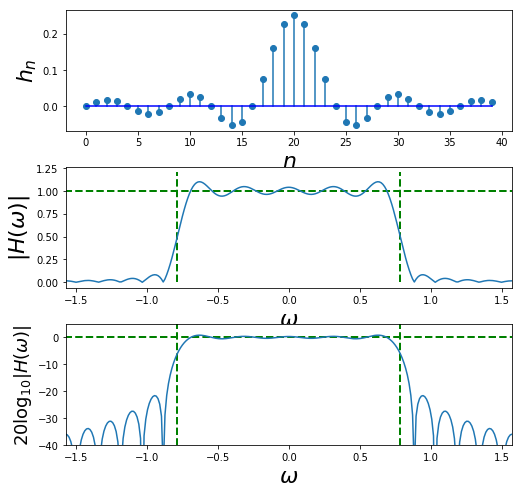

In [38]:
# Listing 5.4
from scipy import signal
from numpy import fft

wc = pi/4
M = 20
N = 512 # DFT size
n = arange(-M,M)
h = wc/pi * sinc(wc*(n)/pi) # see definition of np.sinc()

w,Hh = signal.freqz(h,1,whole=True, worN=N) # get entire frequency domain
wx = fft.fftfreq(len(w)) # shift to center for plotting

fig,axs = subplots(3,1)
fig.set_size_inches((8,8))
subplots_adjust(hspace=0.3)
ax=axs[0]
ax.stem(n+M,h,basefmt='b-')
ax.set_xlabel("$n$",fontsize=22)
ax.set_ylabel("$h_n$",fontsize=22)

ax=axs[1]
ax.plot(w-pi,abs(fft.fftshift(Hh)))
ax.axis(xmax=pi/2,xmin=-pi/2)
ax.vlines([-wc,wc],0,1.2,color='g',lw=2.,linestyle='--',)
ax.hlines(1,-pi,pi,color='g',lw=2.,linestyle='--',)
ax.set_xlabel(r"$\omega$",fontsize=22)
ax.set_ylabel(r"$|H(\omega)| $",fontsize=22)

ax=axs[2]
ax.plot(w-pi,20*log10(abs(fft.fftshift(Hh))))
ax.axis(ymin=-40,xmax=pi/2,xmin=-pi/2)
ax.vlines([-wc,wc],10,-40,color='g',lw=2.,linestyle='--',)
ax.hlines(0,-pi,pi,color='g',lw=2.,linestyle='--',)
ax.set_xlabel(r"$\omega$",fontsize=22)
ax.set_ylabel(r"$20\log_{10}|H(\omega)| $",fontsize=18)

Text(0,0.5,'$20\\log_{10}|H(\\omega)| $')

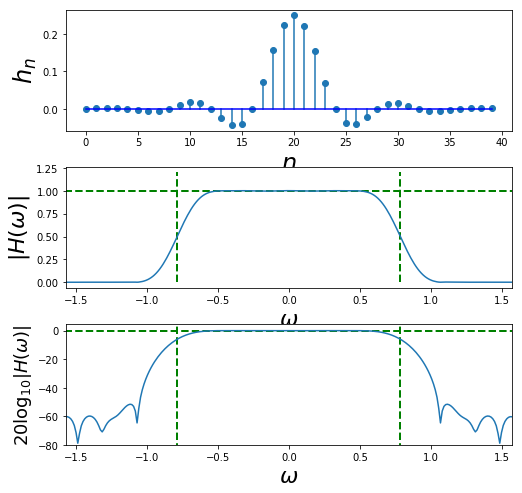

In [40]:
# Listing 5.6
wc = pi/4

M=20

N = 512 # DFT size
n = arange(-M,M)
win = signal.windows.hamming(len(n))
h = wc/pi * sinc(wc*(n)/pi)*win # see definition of np.sinc()

w,Hh = signal.freqz(h,1,whole=True, worN=N) # get entire frequency domain
wx = fft.fftfreq(len(w)) # shift to center for plotting

fig,axs = subplots(3,1)
fig.set_size_inches((8,8))
subplots_adjust(hspace=0.3)

ax=axs[0]
ax.stem(n+M,h,basefmt='b-')
ax.set_xlabel("$n$",fontsize=24)
ax.set_ylabel("$h_n$",fontsize=24)
ax=axs[1]
ax.plot(w-pi,abs(fft.fftshift(Hh)))
ax.axis(xmax=pi/2,xmin=-pi/2)
ax.vlines([-wc,wc],0,1.2,color='g',lw=2.,linestyle='--',)
ax.hlines(1,-pi,pi,color='g',lw=2.,linestyle='--',)
ax.set_xlabel(r"$\omega$",fontsize=22)
ax.set_ylabel(r"$|H(\omega)| $",fontsize=22)

ax=axs[2]
ax.plot(w-pi,20*log10(abs(fft.fftshift(Hh))))
ax.axis(ymin=-80,xmax=pi/2,xmin=-pi/2)
ax.vlines([-wc,wc],10,-80,color='g',lw=2.,linestyle='--',)
ax.hlines(0,-pi,pi,color='g',lw=2.,linestyle='--',)
ax.set_xlabel(r"$\omega$",fontsize=22)
ax.set_ylabel(r"$20\log_{10}|H(\omega)| $",fontsize=18)

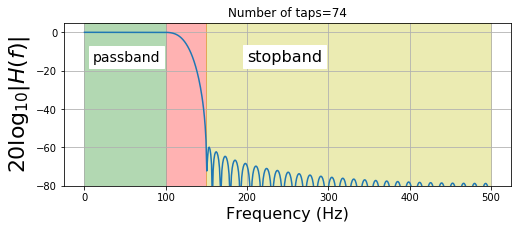

In [44]:
# Listing 5.7
Ns =300 # number of samples
N = 1024 # DFT size

fs = 1e3 # sample rate in Hz
fpass = 100 # in Hz
fstop = 150 # in Hz
delta = 60 # in dB, desired attenuation in stopband

# Listing 5.8
from matplotlib.patches import Rectangle

M,beta= signal.fir_filter_design.kaiserord(delta, (fstop-fpass)/(fs/2.))

hn = signal.firwin(M,(fstop+fpass)/2.,window=('kaiser',beta),nyq=fs/2.)
w,H = signal.freqz(hn) # frequency response

fig,ax = subplots()
fig.set_size_inches((8,3))

ax.plot(w/pi*fs/2.,20*log10(abs(H)))
ax.set_xlabel("Frequency (Hz)",fontsize=16)
ax.set_ylabel(r"$20\log_{10} |H(f)| $",fontsize=22)
ymin,ymax = -80,5
ax.axis(ymin = ymin,ymax=ymax)
ax.add_patch(Rectangle((0,ymin),width=fpass,
             height=ymax-ymin,
             color='g',alpha=0.3))
ax.add_patch(Rectangle((fpass,ymin),width=fstop-fpass,
             height=ymax-ymin,
             color='r',alpha=0.3))
ax.add_patch(Rectangle((fstop,ymin),width=fs/2-fstop,
             height=ymax-ymin,
             color='y',alpha=0.3))
ax.set_title("Number of taps=%d"%M)
ax.text(10,-15,'passband',fontsize=14,bbox=dict(color='white'))
ax.text(200,-15,'stopband',fontsize=16,bbox=dict(color='white'))
ax.grid()

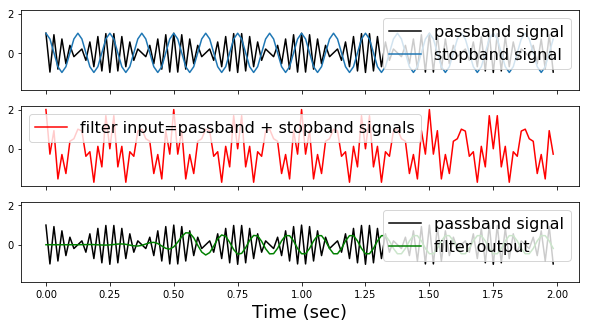

In [45]:
# Listing 5.14
x_pass = cos(2*pi*30*t) # passband signal
x_stop = cos(2*pi*200*t) # stopband signal
x = x_pass + x_stop
y=signal.lfilter(hn,1,x)

fig,axs = subplots(3,1,sharey=True,sharex=True)
fig.set_size_inches((10,5))

ax=axs[0]
ax.plot(t,x_pass,label='passband signal',color='k')
ax.plot(t,x_stop,label='stopband signal')
ax.legend(loc=0,fontsize=16)

ax=axs[1]
ax.plot(t,x,label='filter input=passband + stopband signals',color='r')
ax.legend(loc=0,fontsize=16)

ax=axs[2]
ax.plot(t,x_pass,label='passband signal',color='k')
ax.plot(t,y,label='filter output',color='g')
ax.set_xlabel("Time (sec)",fontsize=18)
ax.legend(loc=0,fontsize=16);